# 🧪 COVID-19 Global Data Analysis with Python

A time-series analysis of global COVID-19 data using confirmed, death, and recovery statistics.

In [1]:
# Importing essential Python libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
# 📥 Loading COVID-19 time-series data for confirmed, death, and recovery cases

confirmed_data = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_data = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_data = pd.read_csv('time_series_covid19_recovered_global.csv')

⚠️ Note: Recovered data ends in August 2021, while confirmed and deaths continue till March 2023.

# Data Cleaning and Data Manipulation

In [3]:
# 🔍 Displaying the top rows of the confirmed cases dataset to understand its structure
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
# Displaying the top rows of the deaths dataset to inspect its structure
deaths_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [5]:
# Displaying the top rows of the recovered dataset to inspect its structure
recovered_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


In [6]:
# Defining a function for cleaning and transforming COVID-19 datasets

def preprocess_covid_data(data):
    # Data Cleaning
    # 🧹 Dropping unnecessary columns such as latitude, longitude, and province/state
    
    data = data.drop(['Lat', 'Long', 'Province/State'], axis=1)
    
    # Filling missing values with 0 for consistency
    
    data = data.fillna(0)
    
    # Data Aggregation
    # # 📊 Grouping the data by country and summing across regions
    
    data_grouped = data.groupby('Country/Region').sum()
    
    # 🔁 Transposing the table to have dates as rows for time series analysis
    data_grouped_ts = data_grouped.T
    data_grouped_ts.index = pd.to_datetime(data_grouped_ts.index, format='%m/%d/%y')
    
    # Resampling the data monthly and selecting the first 20 months
    data_grouped_ts = data_grouped_ts.resample('M').max()[:20]
    
    # ➕ Adding a new column that represents global total cases for each month
    data_grouped_ts['across_world'] = data_grouped_ts.sum(axis=1)
    
    return data_grouped_ts.T

# ⚙️ Preprocessing confirmed, death, and recovered datasets
confirmed_data_grouped = preprocess_covid_data(confirmed_data)
deaths_data_grouped = preprocess_covid_data(deaths_data)
recovered_data_grouped = preprocess_covid_data(recovered_data)

In [7]:
# 🖥️ Displaying the transformed confirmed, deaths, and recovered datasets
confirmed_data_grouped

,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31
Country/Region,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,5,166,1827,15180,31445,36628,38248,39354,41334,46215,52330,55023,55714,56454,59745,71838,118659,147154,153220
Albania,0,0,243,773,1137,2535,5276,9513,13649,20875,38182,58316,78127,107167,125157,131085,132315,132521,133081,146387
Algeria,0,1,716,4006,9394,13907,30394,44494,51530,57942,83199,99610,107339,113092,117192,122108,128913,139626,171392,196080
Andorra,0,0,376,745,764,855,925,1176,2050,4756,6745,8049,9937,10866,12010,13232,13727,13911,14678,15033
Angola,0,0,7,27,86,284,1148,2654,4972,10805,15139,17553,19796,20807,22311,26652,34551,38849,42777,47544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,6,323,1158,1728,1958,2034,2063,2077,2099,2121,2285,4357,6317,6742,6920,7061,7869
Zambia,0,0,35,106,1057,1594,5963,12097,14759,16432,17647,20725,54217,78534,88418,91586,95263,154948,195816,206327


In [8]:
deaths_data_grouped

,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31
Country/Region,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,4,60,254,739,1275,1406,1462,1533,1763,2189,2400,2443,2484,2625,2944,4871,6708,7118
Albania,0,0,15,31,33,62,157,284,387,509,810,1181,1380,1796,2235,2394,2451,2456,2457,2498
Algeria,0,0,44,450,653,912,1210,1510,1736,1964,2431,2756,2891,2983,3093,3253,3472,3716,4254,5269
Andorra,0,0,12,42,51,52,52,53,53,75,76,84,101,110,115,125,127,127,128,130
Angola,0,0,2,2,4,13,52,108,183,284,348,405,466,508,537,596,766,900,1011,1217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,2,80,312,493,566,587,599,605,610,615,634,888,1226,1321,1361,1375,1472
Zambia,0,0,0,3,7,24,151,288,332,349,357,388,763,1091,1208,1251,1281,2199,3389,3602


In [9]:
recovered_data_grouped

,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31
Country/Region,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,5,260,1328,14131,25509,29089,32789,34321,36831,41727,47679,49333,51550,53206,57629,71012,82586,82586
Albania,0,0,52,470,872,1459,2952,5214,7847,11189,18849,33634,47424,69773,91271,109338,129431,130009,130222,130314
Algeria,0,0,65,1779,5748,9897,20537,31244,36174,40201,53809,67127,73344,78098,81538,85108,89839,97089,115276,118409
Andorra,0,0,10,468,694,799,807,908,1432,3475,5873,7432,9093,10446,11315,12684,13458,13720,14210,14380
Angola,0,0,1,7,18,93,437,1335,1941,4523,7851,11044,18035,19322,20493,23876,28079,33242,37255,39582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,1,14,488,862,1131,1286,1366,1382,1394,1426,1435,1676,2751,3445,4068,4185,4251
Zambia,0,0,0,55,779,1329,3803,11469,13959,15680,16998,18660,48000,74498,84592,89933,91956,131792,187236,189658


# Visualizing Global COVID-19 Trends

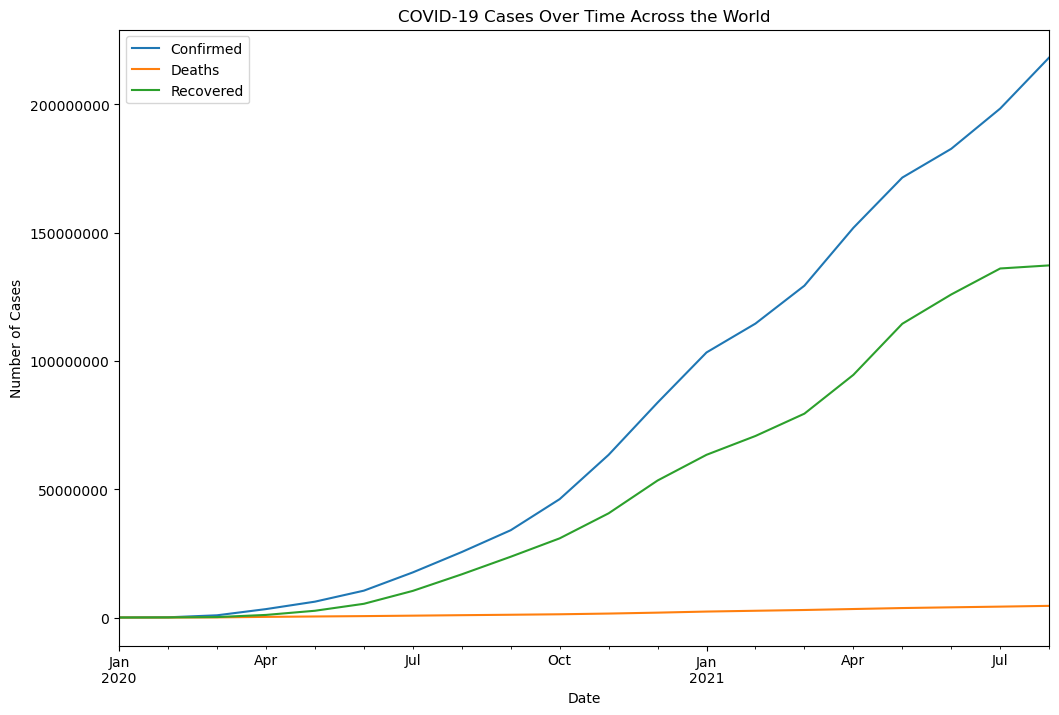

In [10]:
# 📊 Plotting the global COVID-19 confirmed, death, and recovery trends over time
plt.figure(figsize=(12, 8))  # Setting the size of the plot

# 📈 Plotting confirmed cases over time
confirmed_data_grouped.T['across_world'].plot()

# 📉 Plotting death cases over time
deaths_data_grouped.T['across_world'].plot()

# 📈 Plotting recovered cases over time
recovered_data_grouped.T['across_world'].plot()

# Formatting and labeling the plot
plt.ticklabel_format(style='plain', axis='y')  # Turning off scientific notation on y-axis
plt.legend(['Confirmed', 'Deaths', 'Recovered'])  # Adding legend
plt.title('COVID-19 Cases Over Time Across the World')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Number of Cases')  # Y-axis label
plt.show()  # Displaying the plot

# Data Manipulating

In [11]:
# Extracting the most recent total confirmed cases for each country
total_confirmed = confirmed_data_grouped[[confirmed_data_grouped.columns[-1]]]
total_confirmed.columns = ['confirmed_cases']
total_confirmed

,confirmed_cases
Country/Region,
Afghanistan,153220
Albania,146387
Algeria,196080
Andorra,15033
Angola,47544
...,...
Winter Olympics 2022,0
Yemen,7869
Zambia,206327


In [12]:
# Extracting the most recent total death cases for each country
total_deaths = deaths_data_grouped[[deaths_data_grouped.columns[-1]]]
total_deaths.columns = ['death_cases']
total_deaths


,death_cases
Country/Region,
Afghanistan,7118
Albania,2498
Algeria,5269
Andorra,130
Angola,1217
...,...
Winter Olympics 2022,0
Yemen,1472
Zambia,3602


In [13]:
# Extracting the most recent total recovered cases for each country
total_recovered = recovered_data_grouped[[recovered_data_grouped.columns[-1]]]
total_recovered.columns = ['recovered_cases']
total_recovered

,recovered_cases
Country/Region,
Afghanistan,82586
Albania,130314
Algeria,118409
Andorra,14380
Angola,39582
...,...
Winter Olympics 2022,0
Yemen,4251
Zambia,189658


In [14]:
# Data Manipulating (Data wrangling)
# 🔗 Merging confirmed, death, and recovered datasets on country name
merged_data = pd.merge(total_confirmed, total_deaths, on='Country/Region')
merged_data = pd.merge(merged_data, total_recovered, on='Country/Region')

In [15]:
merged_data

,confirmed_cases,death_cases,recovered_cases
Country/Region,,,
Afghanistan,153220,7118,82586
Albania,146387,2498,130314
Algeria,196080,5269,118409
Andorra,15033,130,14380
Angola,47544,1217,39582
...,...,...,...
Winter Olympics 2022,0,0,0
Yemen,7869,1472,4251
Zambia,206327,3602,189658


# Descriptive Statistics

In [16]:
# 📊 Calculating the mean number of cases across all countries
average_of_cases = pd.DataFrame(merged_data[:-2].mean(), columns=['mean'])

average_of_cases  # Showing the calculated mean for each case type

,mean
confirmed_cases,1090799.52
death_cases,22715.71
recovered_cases,685851.60


# Data Visualization

<Axes: title={'center': 'Top 15 Confirmed Cases Countries'}, xlabel='Country/Region', ylabel='Number of Cases'>

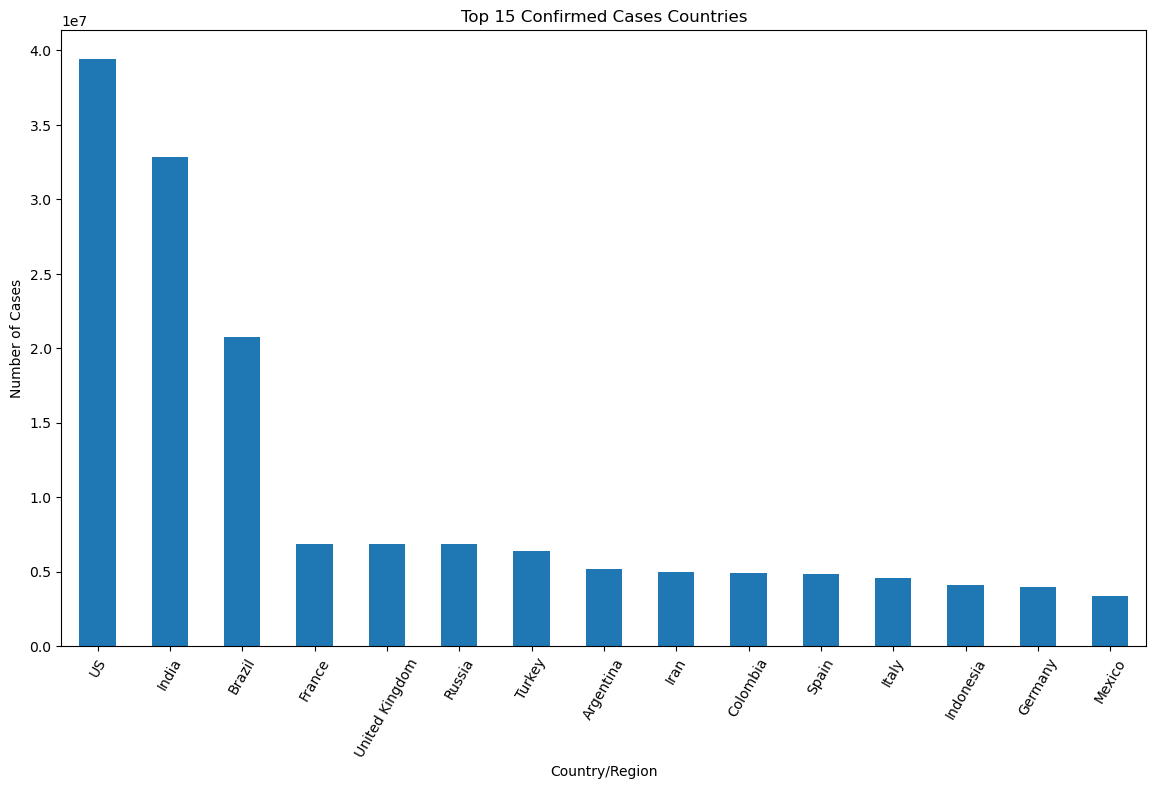

In [17]:
# Visualizing Top 15 Countries with Highest Confirmed Cases
# Sorting countries by total confirmed cases in descending order
total_confirmed_sorted = total_confirmed.sort_values(by='confirmed_cases', ascending=False)

# 📊 Plotting a bar chart for top 15 countries by confirmed cases
total_confirmed_sorted['confirmed_cases'][1:16].plot.bar(
    figsize=(14, 8), 
    title='Top 15 Confirmed Cases Countries',
    ylabel="Number of Cases",
    rot=60
)

<Axes: title={'center': 'Top 15 Death Cases Countries'}, xlabel='Country/Region', ylabel='Number of Cases'>

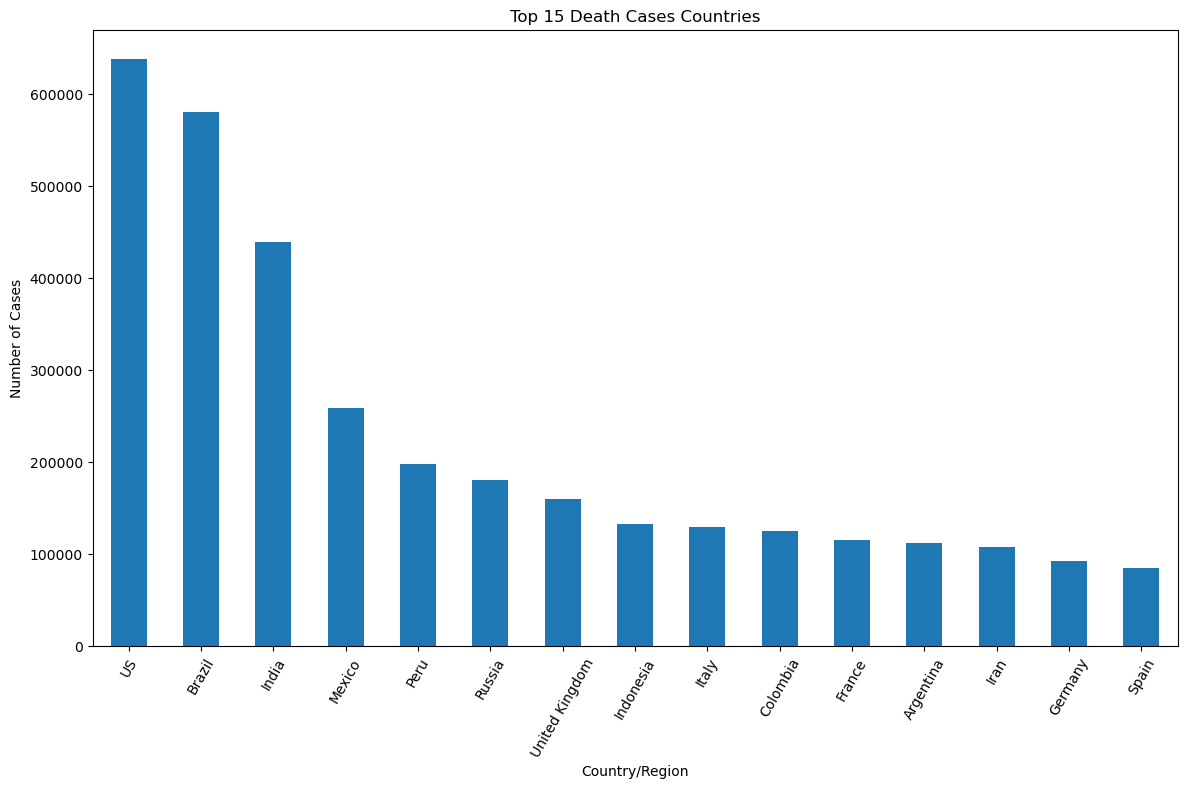

In [18]:
# Visualizing top 15 death cases countries
# Sorting countries by total death cases in descending order
total_deaths_sorted = total_deaths.sort_values(by='death_cases', ascending=False)

# 📊 Plotting a bar chart for top 15 countries by death cases
total_deaths_sorted['death_cases'][1:16].plot.bar(
    figsize=(14, 8),
    title='Top 15 Death Cases Countries',
    ylabel="Number of Cases",
    rot=60
)

<Axes: title={'center': 'Top 15 Recovered Cases Countries'}, xlabel='Country/Region', ylabel='Number of Cases'>

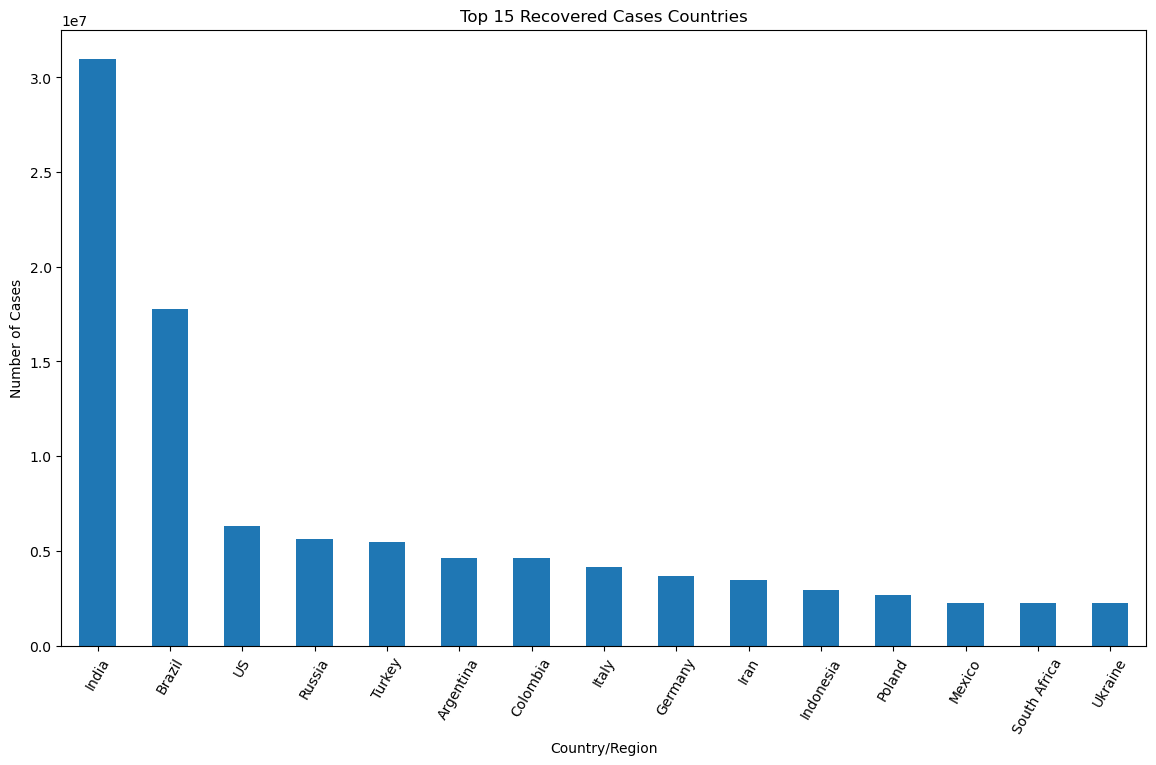

In [19]:
# Visualize top 15 recovered cases countries
# Sorting countries by total recovered cases in descending order
total_recovered_sorted = total_recovered.sort_values(by='recovered_cases', ascending=False)

# 📊 Plotting a bar chart for top 15 countries by recovered cases
total_recovered_sorted['recovered_cases'][1:16].plot.bar(
    figsize=(14, 8),
    title='Top 15 Recovered Cases Countries',
    ylabel="Number of Cases",
    rot=60
)


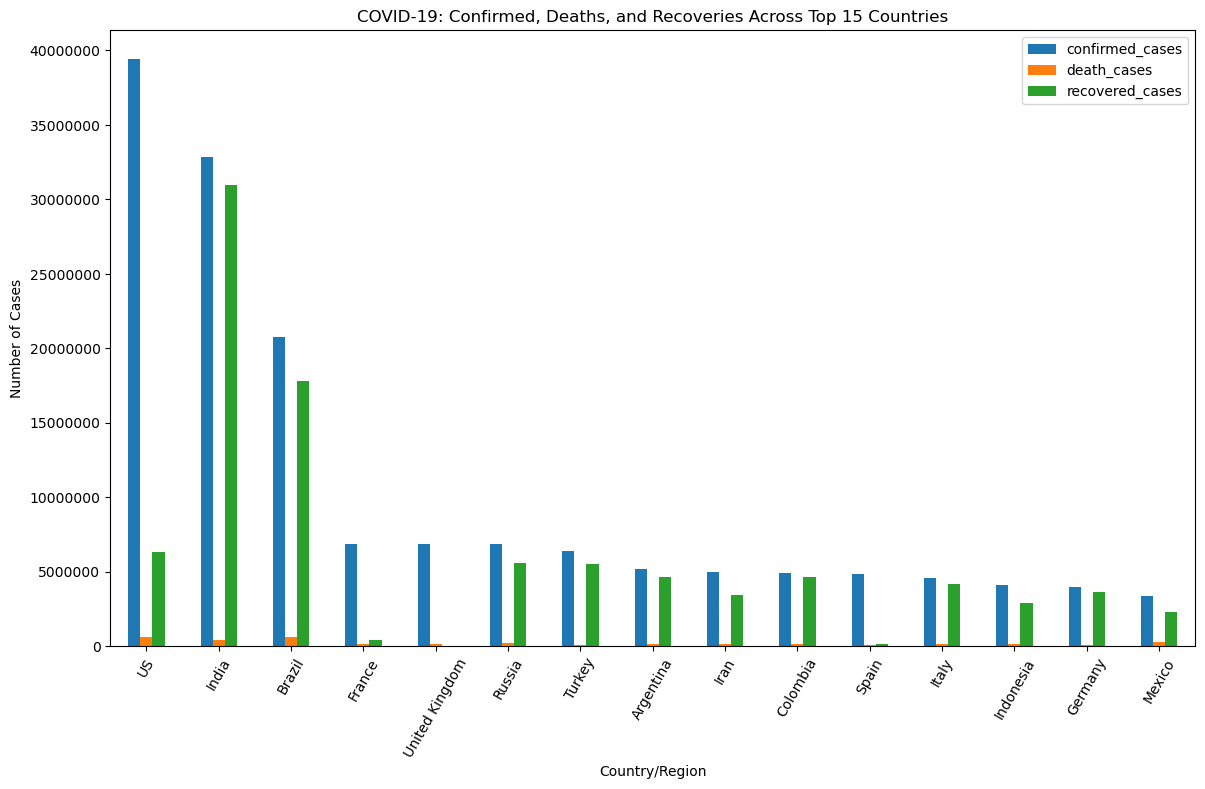

In [20]:
# Visualizing Cases, Deaths, and Recoveries Across Top 15 Countries
# Sorting countries by highest confirmed cases and selecting top 15 entries
top_15_confirmed = merged_data.sort_values(by='confirmed_cases', ascending=False)
top_15_confirmed = top_15_confirmed[['confirmed_cases', 'death_cases', 'recovered_cases']][1:16]

# 📊 Plotting a grouped bar chart to compare confirmed, deaths, and recoveries across top 15 countries
top_15_confirmed.plot.bar(
    figsize=(14, 8),
    title='COVID-19: Confirmed, Deaths, and Recoveries Across Top 15 Countries',
    ylabel="Number of Cases",
    rot=60
)
plt.ticklabel_format(style='plain', axis='y')  # Disabling scientific notation on y-axis

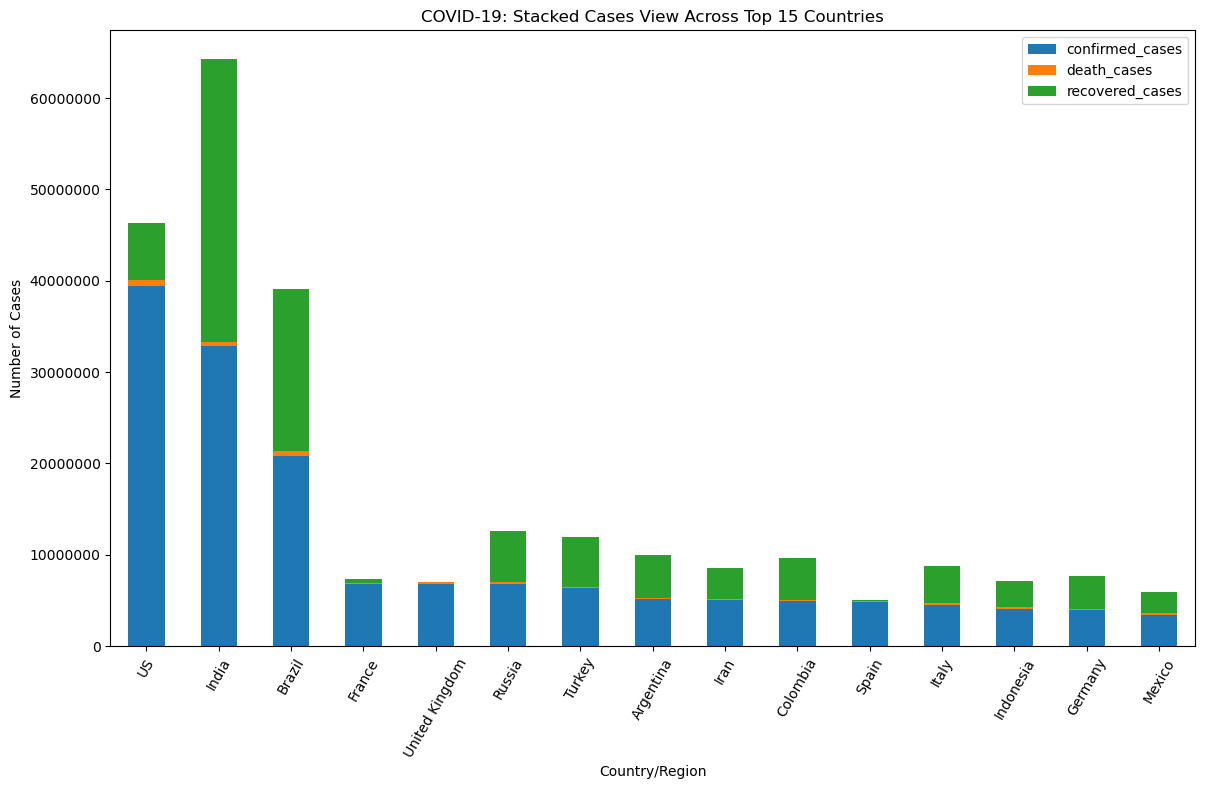

In [21]:
# 📊 Plotting a stacked horizontal bar chart for clearer proportional comparison
top_15_confirmed.plot.bar(
    figsize=(14, 8),
    title='COVID-19: Stacked Cases View Across Top 15 Countries',
    ylabel="Number of Cases",
    rot=60,
    stacked=True
)
plt.ticklabel_format(style='plain', axis='y')  # Disabling scientific notation on y-axis